In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyproj
from pyproj import Proj, transform

# EDA

Archivo donde analizaremos los datasets de siniestros viales, en busca de outliers o valores atípicos, y buscando patrones interesante para el analisis y el armado del dashboard para es plroyecto N°2 de Data Analytics

Carga de datos

In [129]:
Hechos = pd.read_csv('datasets/homicidios_hechos.csv')
Victimas = pd.read_csv('datasets/homicidios_victimas.csv')

Comenzaremos viisualizando las primeras lineas de los dataset para comprender su estructura y visualizar las variables. También verificar el tamaño de cada uno.

In [130]:
Hechos

,id,n_victimas,fecha,mm,hora,hh,tipo_de_calle,comuna,longitud,latitud,participantes,victima,acusado
0,2016-0001,1,2016-01-01,1,4:00:00,4,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,1,1:15:00,1,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,1,7:00:00,7,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,1,0:00:00,0,AVENIDA,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,1,5:20:00,5,AVENIDA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,12,17:10:00,17,AVENIDA,7,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,12,1:10:00,1,AUTOPISTA,9,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,12,0:43:00,0,AVENIDA,11,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,12,10:30:00,10,AVENIDA,9,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [131]:
Victimas

,Unnamed: 0,id_hecho,fecha,rol,victima,sexo,edad
0,0,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19
1,1,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70
2,2,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30
3,3,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18
4,4,2016-0005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29
...,...,...,...,...,...,...,...
712,712,2021-0092,2021-12-12,PEATON,PEATON,FEMENINO,50
713,713,2021-0093,2021-12-13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18
714,714,2021-0094,2021-12-20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43
715,715,2021-0095,2021-12-30,CONDUCTOR,MOTO,MASCULINO,27


Analizaremos columnas con valores numéricos en busca de outliers o valores atípicos.

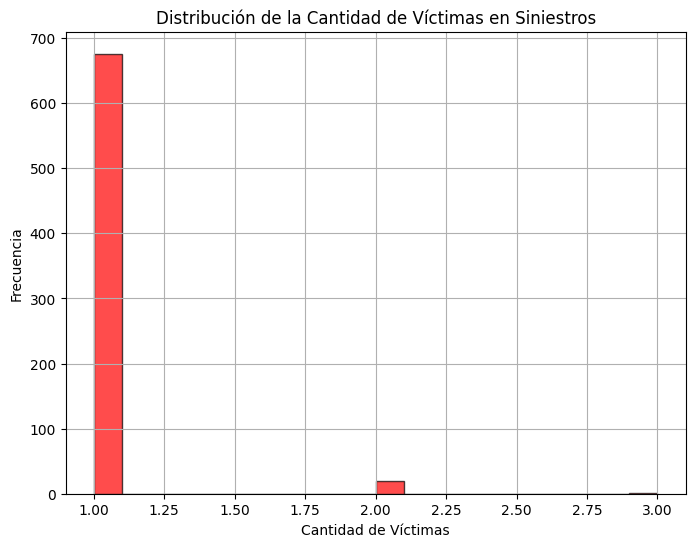

In [132]:
# Seleccionar la columna de la cantidad de víctimas
n_victimas = Hechos['n_victimas']

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(n_victimas, bins=20, color='red', edgecolor='black', alpha=0.7)

# Añadir etiquetas y título
plt.xlabel('Cantidad de Víctimas')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Cantidad de Víctimas en Siniestros')

# Mostrar el histograma
plt.grid(True)
plt.show()

Vemos que la mayor cantidad de victimas fatales en siniestros viales siempre suele ser de 1, dejando victimas fatales multiples muy por debajo.

Ahora pasaremos a vizualisar la cantidad de siniestros en los diferentes años

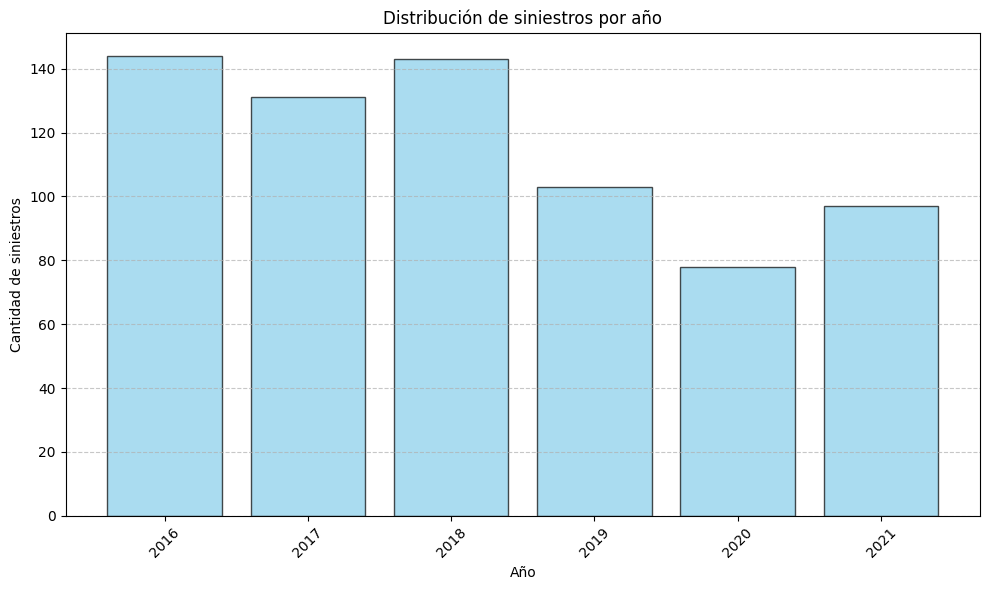

In [133]:
# Convertir la columna 'fecha' a datetime si no lo está
Hechos['fecha'] = pd.to_datetime(Hechos['fecha'])

# Luego puedes extraer el año de la columna 'fecha'
Hechos['año'] = Hechos['fecha'].dt.year

# Ahora puedes contar la cantidad de siniestros por año y graficarlos
siniestros_por_año = Hechos.groupby('año').size()

# Graficar la distribución de siniestros a lo largo de los años
plt.figure(figsize=(10, 6))
plt.bar(siniestros_por_año.index, siniestros_por_año, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribución de siniestros por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de siniestros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Aca observamos como los año 2016 y 2018 fueron los años con mayor cantidad de siniestros víales, y el año 2020 el año con menos cantidad, esto también podemos pensar como un evento externo como fue la pandemía de COVID-19 afectó positivamente al descenso de casos de siniestros viales. Tambien podemos ver que ya en el año 2019 hubo una baja de siniestros viales en comparación con los años anteriores.

In [134]:
tipo_datos = Hechos["hora"].dtype
print(tipo_datos)

object


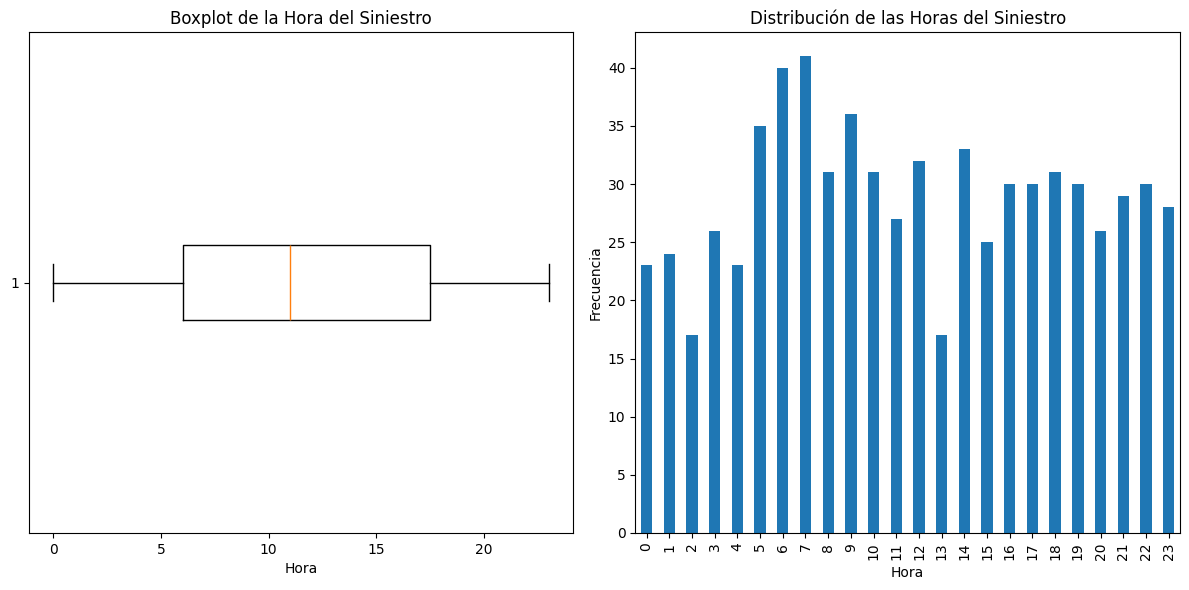

In [135]:
# Filtrar las filas donde la hora no es 'SD'
Hechos_filtrados = Hechos[Hechos["hora"] != 'SD'].copy()

# Convertir la columna filtrada "hora" a formato de tiempo
Hechos_filtrados["hora"] = pd.to_datetime(Hechos_filtrados["hora"], format='%H:%M:%S')

# Crear el boxplot y el gráfico de barras
plt.figure(figsize=(12, 6))

# Boxplot
plt.subplot(1, 2, 1)
plt.boxplot(Hechos_filtrados["hora"].dt.hour, vert=False)
plt.title("Boxplot de la Hora del Siniestro")
plt.xlabel("Hora")
plt.ylabel("")

# Gráfico de barras
plt.subplot(1, 2, 2)
Hechos_filtrados["hora"].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.title("Distribución de las Horas del Siniestro")
plt.xlabel("Hora")
plt.ylabel("Frecuencia")

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

Observamos que no vemos existencias de algun valor atípico en la columna horas y en el gráfico de barras podemos observar como hay una tendencia en donde los siniestros son más frecuentes en las horas 6 y 7. Esto lo podríamos pensar como una causa de alcohol al volante, tomando en cuenta que las personas suelen volver a sus casas después de una salida a algún boliche a esas horas. Sin embargo esta es una interpetación posible, existiendo también la posibilidad de otros factores como el cansancio en los conductores a esas horas o las condiciones de tráfico en ese momento del día.

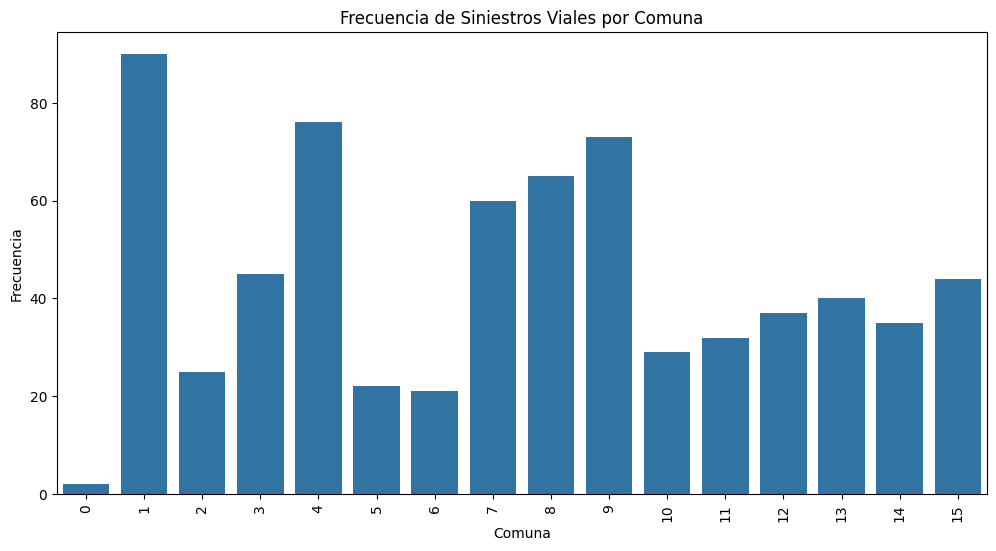

In [136]:
# Eliminar valores NaN si es necesario
Hechos_filtrados = Hechos.dropna(subset=['comuna'])

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=Hechos_filtrados, x="comuna")

# Configurar el título y etiquetas
plt.title("Frecuencia de Siniestros Viales por Comuna")
plt.xlabel("Comuna")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)  # Rotar etiquetas en el eje x para mejor legibilidad
plt.show()

Observamos que los siniestros viales son más frecuentes en la comuna 1 con alta diferencia en cuanto con las comuna 4 y 8 las cuales son las siguientes. 
Hay varios factores que pueden tener una consecuencia son, densidad de población, el tráfico vehicular, la infraestructura vial y las politicas de seguridad vial en cada comuna.
Hay un dato erroneo que aparece como comuna 0, esta comuna no debería estar, por lo cual, veremos la fila o filas donde aparezca la comuna 0 y analizaremos como arreglar esto.

In [137]:
# Filtrar filas donde la comuna es igual a 0
comuna_0 = Hechos[Hechos['comuna'] == 0]

# Mostrar las filas donde la comuna es igual a 0
comuna_0

,id,n_victimas,fecha,mm,hora,hh,tipo_de_calle,comuna,longitud,latitud,participantes,victima,acusado,año
119,2016-0151,1,2016-11-18,11,20:35:00,20,CALLE,0,.,.,PEATON-SD,PEATON,SD,2016
139,2016-0174,1,2016-12-27,12,0:00:00,0,AUTOPISTA,0,.,.,SD-SD,SD,SD,2016


Como podemos observar son filas con valores nulos y SD que equivalen a nulos, por lo tanto lo que optaremos por hacer es eliminarlas.

In [138]:
# Filtrar filas donde la columna 'comuna' es igual a 0 y eliminarlas
Hechos = Hechos[Hechos['comuna'] != 0]

# Vemos la dimensión del dataframe
Hechos.shape

(694, 14)

Usaremos el rango intercuartilico para buscar outliers en la columna EDAD del dataset Victimas

In [139]:
# Convertir la columna "EDAD" a números enteros, ignorando los valores no numéricos
Victimas["edad"] = pd.to_numeric(Victimas["edad"], errors="coerce")

# Eliminar los valores NaN después de la conversión
Victimas.dropna(subset=["edad"], inplace=True)

# Calcular los percentiles
q1 = np.percentile(Victimas["edad"], 25)
q3 = np.percentile(Victimas["edad"], 75)

# Calcular el rango intercuartílico
iqr = q3 - q1

# Definir los límites para identificar outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identificar outliers
outliers = Victimas[(Victimas["edad"] < lower_bound) | (Victimas["edad"] > upper_bound)]

# Imprimir los resultados
print("Percentil 25 (Q1):", q1)
print("Percentil 75 (Q3):", q3)
print("Rango Intercuartílico (IQR):", iqr)
print("Límite inferior para outliers:", lower_bound)
print("Límite superior para outliers:", upper_bound)
print("Número de outliers encontrados:", len(outliers))

Percentil 25 (Q1): 27.0
Percentil 75 (Q3): 56.25
Rango Intercuartílico (IQR): 29.25
Límite inferior para outliers: -16.875
Límite superior para outliers: 100.125
Número de outliers encontrados: 0


Comenzaremos explorando las variables de ambos conjuntos de datos en busca de patrones, tendencias y posibles relaciones entre ellas.

Primero visualizaremos las distribuciones de las columnas de los conjuntos de datos, que nos quedan por observar.

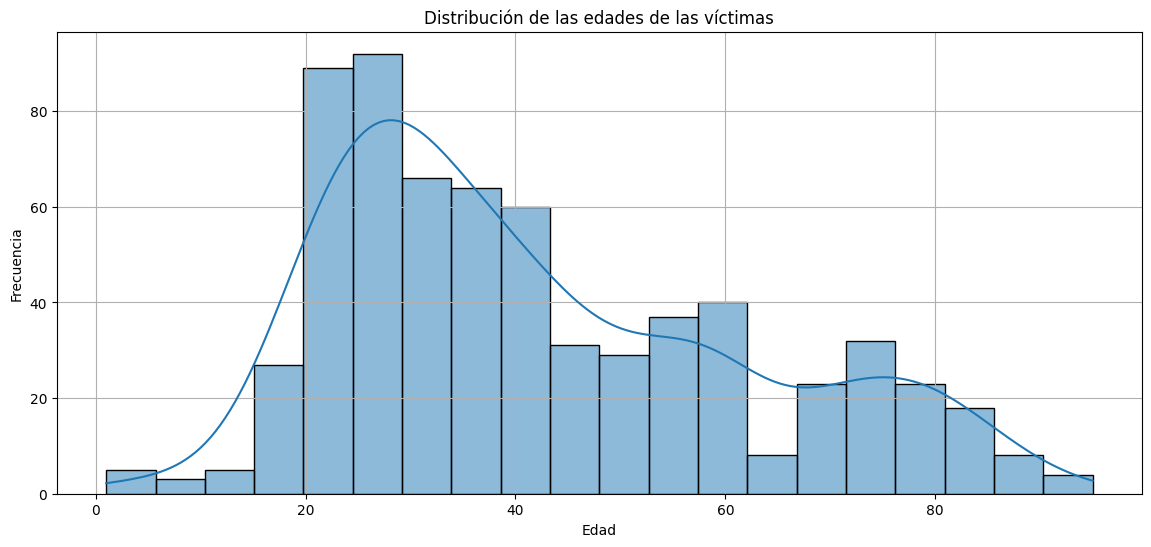

In [140]:
# Visualizar la distribución de la variable "EDAD"
plt.figure(figsize=(14, 6))
sns.histplot(data=Victimas, x='edad', bins=20, kde=True)
plt.title('Distribución de las edades de las víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

En este histograma podemos ver como las edades que con más frecuencias aparecen en un siniestro vial rondan desde los 20 a los 30 años.

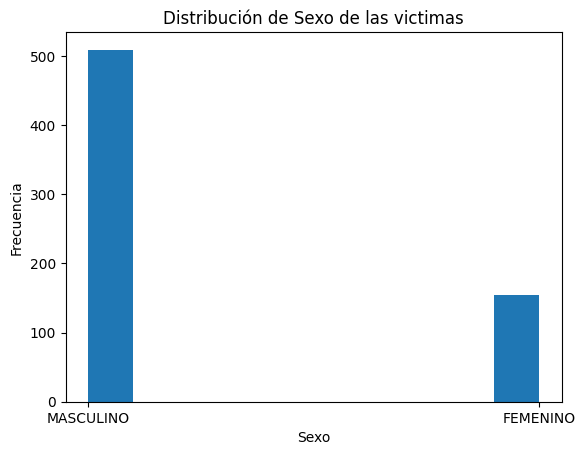

In [141]:
# Se realiza un histograma de la distribución del sexo de las victimas
plt.hist(Victimas['sexo'], bins=10)
plt.title('Distribución de Sexo de las victimas')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()

Podemos ver que en la mayoría de los siniestros viales, la victima tiende a ser una persona de sexo masculino

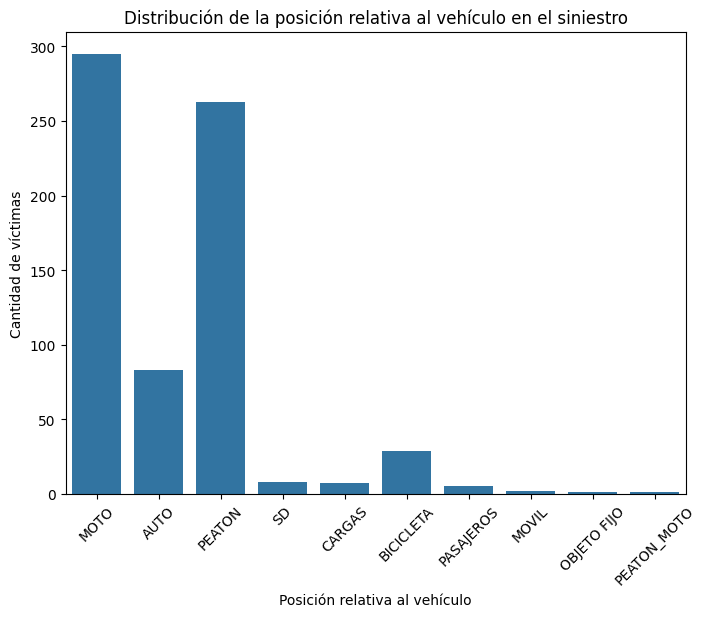

In [142]:
# Visualizar la distribución de la variable "VICTIMA"
plt.figure(figsize=(8, 6))
sns.countplot(data=Hechos, x='victima')
plt.title('Distribución de la posición relativa al vehículo en el siniestro')
plt.xlabel('Posición relativa al vehículo')
plt.ylabel('Cantidad de víctimas')
plt.xticks(rotation=45)
plt.show()

En este gráfico podemos observar que en la mayoria de los casos la victima de los siniestros viales, son personas en moto y peatones, habiendo una gran diferencia con las otras posibilidades.
Vamos a bucar los 2 valores que no existen en diccionario de datos los cuales son, "OBJETO FIJO" y "PEATON_MOTO". El porque de estos valores se puede ser que existen victimas multiples para estos siniestros, por lo cual lo primero que evaluaremos serta ver la cantidad de victimas, Participante y acusados.

In [143]:
# Filtrar filas donde la columna "victimas" contiene los valores "PEATON_MOTO" y "OBJETO FIJO"
filtro_victimas = Hechos[(Hechos['victima'] == 'PEATON_MOTO') | (Hechos['victima'] == 'OBJETO FIJO')]

# Mostrar las primeras filas del resultado
filtro_victimas

,id,n_victimas,fecha,mm,hora,hh,tipo_de_calle,comuna,longitud,latitud,participantes,victima,acusado,año
230,2017-0108,2,2017-09-02,9,4:53:08,4,GRAL PAZ,12,-58.49491054,-34.54795581,AUTO-OBJETO FIJO,OBJETO FIJO,AUTO,2017
583,2020-0063,2,2020-12-05,12,7:10:00,7,CALLE,11,-58.52783814,-34.61047001,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO,2020


Efectvamente vemos que estos datos equivalen a siniestros con victimas multiples. Sin embargo podemos observar en la fila donde tenemos "OBJETO FIJO" como un valor de la columna "victima", que en las columnas dayacentes tenemos valores de "AUTO-OBJETO FIJO" en la columna "participantes" y "AUTO" en la columna acusado. Podemos tomar esto como un error humano al momento de ingresar la información, debido a que "OBJETO FIJO" si es us valor valido para la columna acusado, por lo que invertiremos los valores de estas 2 columnas.

In [144]:
# Filtrar las filas donde la columna "victima" contiene el valor "OBJETO FIJO"
filtro_victimas = Hechos[Hechos['victima'] == 'OBJETO FIJO']

# Invertir los valores de las columnas "victima" y "acusado" solo para esas filas
filtro_victimas.loc[:, ['victima', 'acusado']] = filtro_victimas.loc[:, ['acusado', 'victima']].values
filtro_victimas

,id,n_victimas,fecha,mm,hora,hh,tipo_de_calle,comuna,longitud,latitud,participantes,victima,acusado,año
230,2017-0108,2,2017-09-02,9,4:53:08,4,GRAL PAZ,12,-58.49491054,-34.54795581,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO,2017


In [145]:
# Pasamos los cambios efectuados al dataset
Hechos.loc[filtro_victimas.index[0], ['victima', 'acusado']] = filtro_victimas[['victima', 'acusado']].iloc[0]

Veremos la distribución de la columna victimas del dataset de Hechos

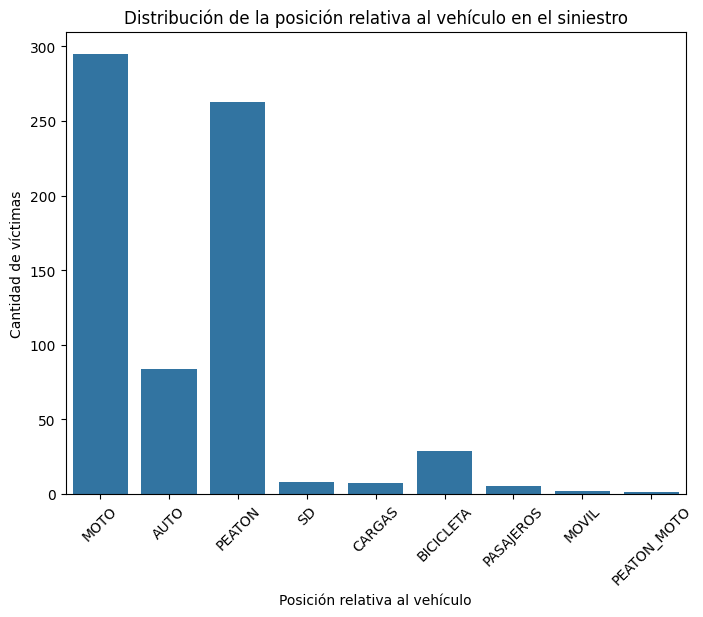

In [146]:
# Visualizar la distribución de la variable "VICTIMA"
plt.figure(figsize=(8, 6))
sns.countplot(data=Hechos, x='victima')
plt.title('Distribución de la posición relativa al vehículo en el siniestro')
plt.xlabel('Posición relativa al vehículo')
plt.ylabel('Cantidad de víctimas')
plt.xticks(rotation=45)
plt.show()

Vemos la distribución de la columna "victima" del dataset de Victimas

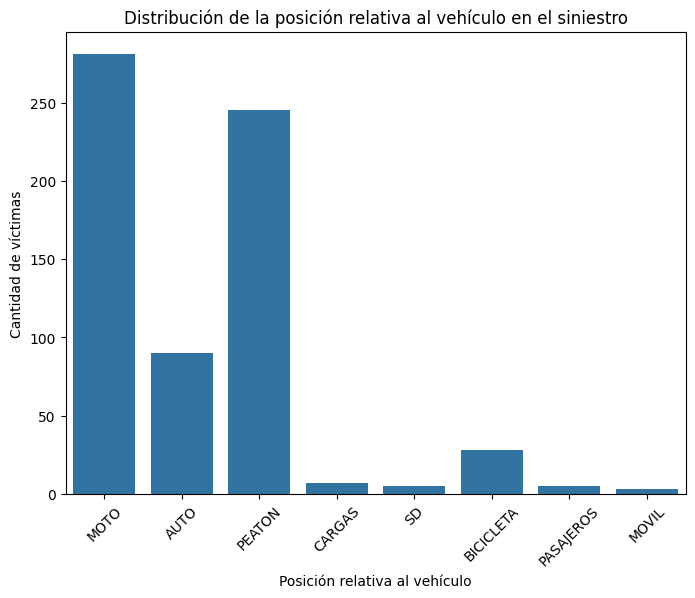

In [147]:
# Visualizar la distribución de la variable "VICTIMA"
plt.figure(figsize=(8, 6))
sns.countplot(data=Victimas, x='victima')
plt.title('Distribución de la posición relativa al vehículo en el siniestro')
plt.xlabel('Posición relativa al vehículo')
plt.ylabel('Cantidad de víctimas')
plt.xticks(rotation=45)
plt.show()

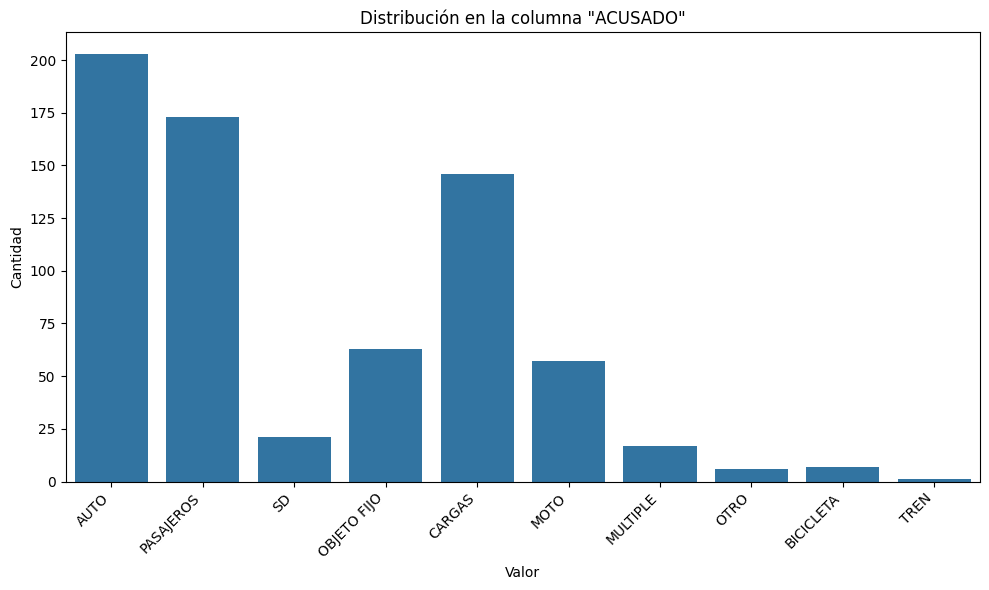

In [148]:
# Visualizar el conteo de valores únicos en la columna "ACUSADO"
plt.figure(figsize=(10, 6))
sns.countplot(data=Hechos, x='acusado')
plt.title('Distribución en la columna "ACUSADO"')
plt.xlabel('Valor')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

Podemos ver que la mayoria de veces que ocurre un siniestro el valor de Acusado toma el de AUTO o el de PASAJEROS.

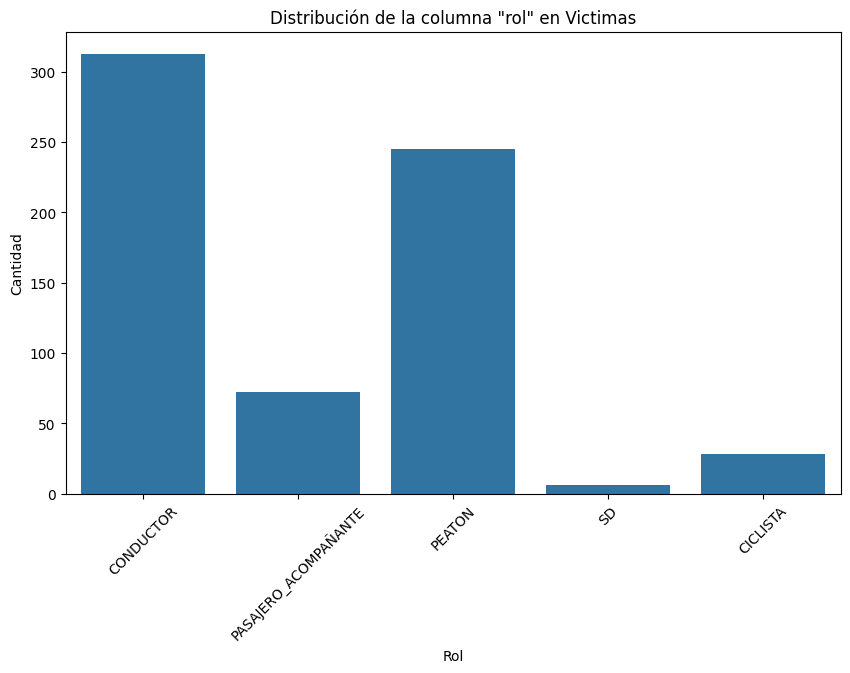

In [149]:
# Gráfico de barras de la distribución de la columna "rol"
plt.figure(figsize=(10, 6))
sns.countplot(x='rol', data=Victimas)
plt.title('Distribución de la columna "rol" en Victimas')
plt.xlabel('Rol')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

Vemos que cuando ocurre un siniestro vial, la mayoria de veces la columna de rol toma el valor de conductor

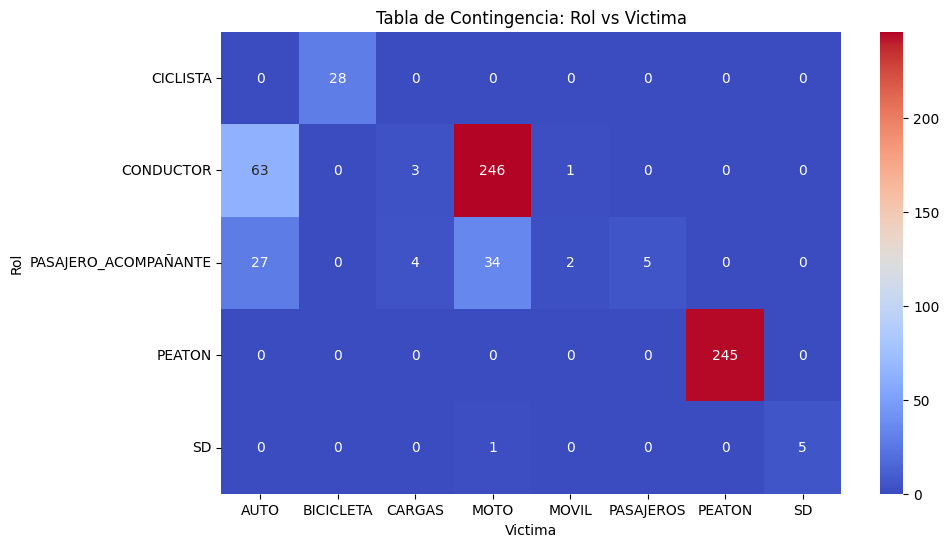

In [150]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(Victimas['rol'], Victimas['victima'])

# Crear un mapa de calor para visualizar la tabla de contingencia
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Tabla de Contingencia: Rol vs Victima')
plt.xlabel('Victima')
plt.ylabel('Rol')
plt.show()

Podemos observar en este Heatmap que las variable que se correlacionan en el momento de un siniestro vial son "MOTO"-"CONDUCTOR" y "PEATON"-"PEATON".
Por ende lo que extraemos de este gráfico es que mayormente cuando ocurre un siniestro vial con una moto implicada, es más probable que el conductor de la moto sea el damnificado, luego cuando hay un siniestro con un auto, mayormente el damnificado es el conductor o el aompañante.

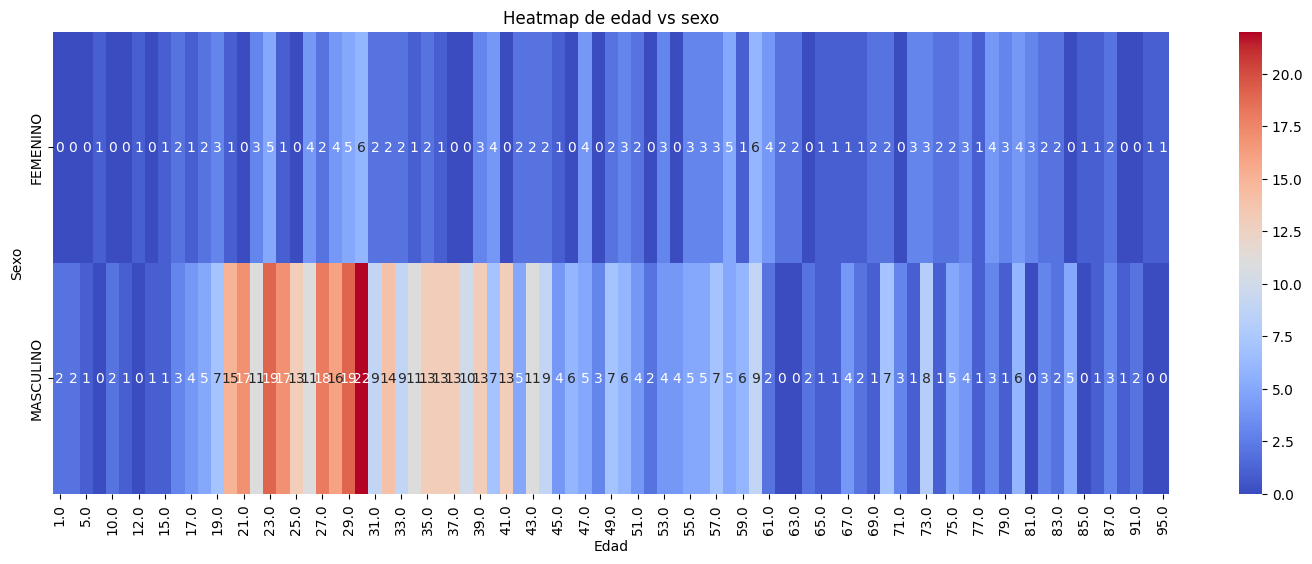

In [151]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(Victimas['sexo'], Victimas['edad'])

# Crear un mapa de calor para visualizar la tabla de contingencia
plt.figure(figsize=(18, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap de edad vs sexo')
plt.xlabel('Edad')
plt.ylabel('Sexo')
plt.show()

Atraves de este heatmap, podemos observar que la mayoría de victimas en un siniestro vial son personas masculinas que rondan los años de 20 a 30 años. Y podemos observar que en caso de las personas de sexo femenino es un valor mucho menor y no tiene una concentración real en algún rango etario.

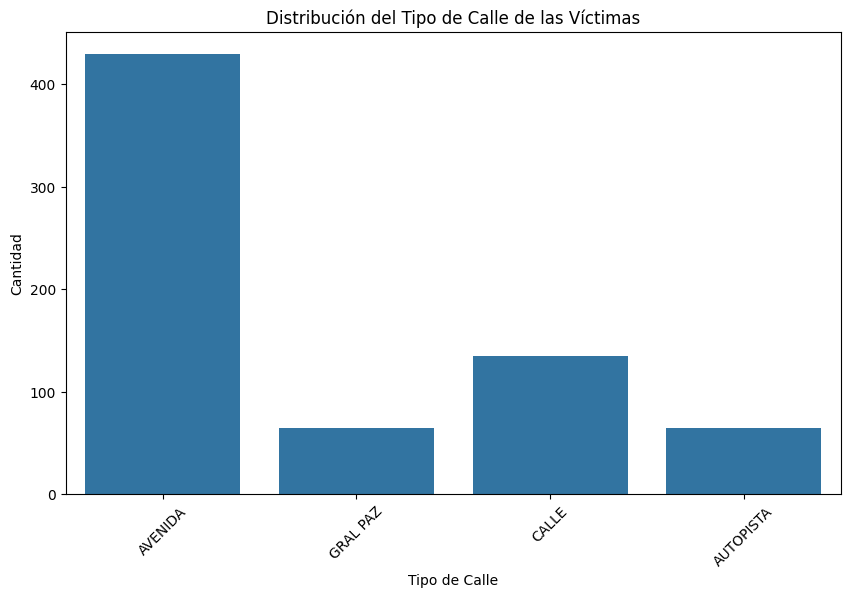

In [152]:
# Crear un gráfico de barras de la distribución de la columna "tipo_de_calle"
plt.figure(figsize=(10, 6))
sns.countplot(x='tipo_de_calle', data=Hechos)
plt.title('Distribución del Tipo de Calle de las Víctimas')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

En esta distribución podemos observar que los siniestros viales son mucho más frecuentes en las avenidas.

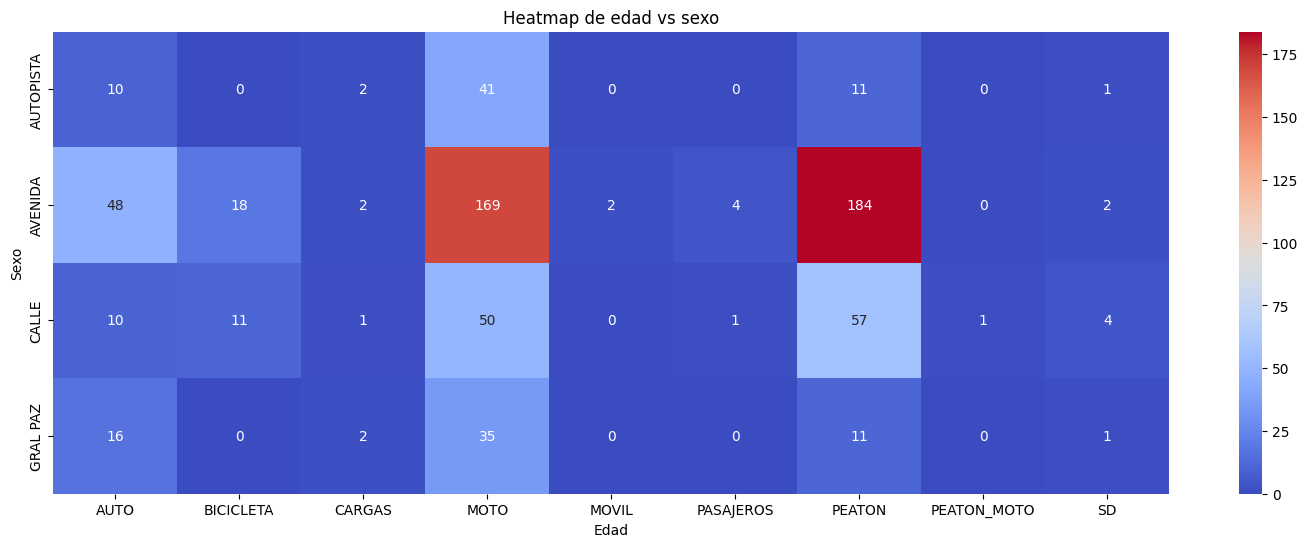

In [153]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(Hechos['tipo_de_calle'], Hechos['victima'])

# Crear un mapa de calor para visualizar la tabla de contingencia
plt.figure(figsize=(18, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap de edad vs sexo')
plt.xlabel('Edad')
plt.ylabel('Sexo')
plt.show()

En esta matriz podemos observar como se relacionan las variables de avenida con la variables de peatón, marcando significativamente que en la mayoria de los siniestros en avenidad se ve afectado un peaton y luego las motos.

Ya con el analisis terminado, pasaremos a exportar los dataset para asi ya podes trabajar con nuestro dashboard

In [154]:
Hechos.to_csv('datasets/homicidios_h_final.csv')
Victimas.to_csv('datasets/homicidios_v_final.csv')

In [155]:
Hechos

,id,n_victimas,fecha,mm,hora,hh,tipo_de_calle,comuna,longitud,latitud,participantes,victima,acusado,año
0,2016-0001,1,2016-01-01,1,4:00:00,4,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,2016
1,2016-0002,1,2016-01-02,1,1:15:00,1,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,2016
2,2016-0003,1,2016-01-03,1,7:00:00,7,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,2016
3,2016-0004,1,2016-01-10,1,0:00:00,0,AVENIDA,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,2016
4,2016-0005,1,2016-01-21,1,5:20:00,5,AVENIDA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,12,17:10:00,17,AVENIDA,7,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,2021
692,2021-0094,1,2021-12-20,12,1:10:00,1,AUTOPISTA,9,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,2021
693,2021-0095,1,2021-12-30,12,0:43:00,0,AVENIDA,11,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,2021
694,2021-0096,1,2021-12-15,12,10:30:00,10,AVENIDA,9,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,2021
